# Explore here

In [2]:
import pandas as pd

file_path = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
data = pd.read_csv(file_path)

data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

In [3]:
descriptive_stats = data.describe()
descriptive_stats


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


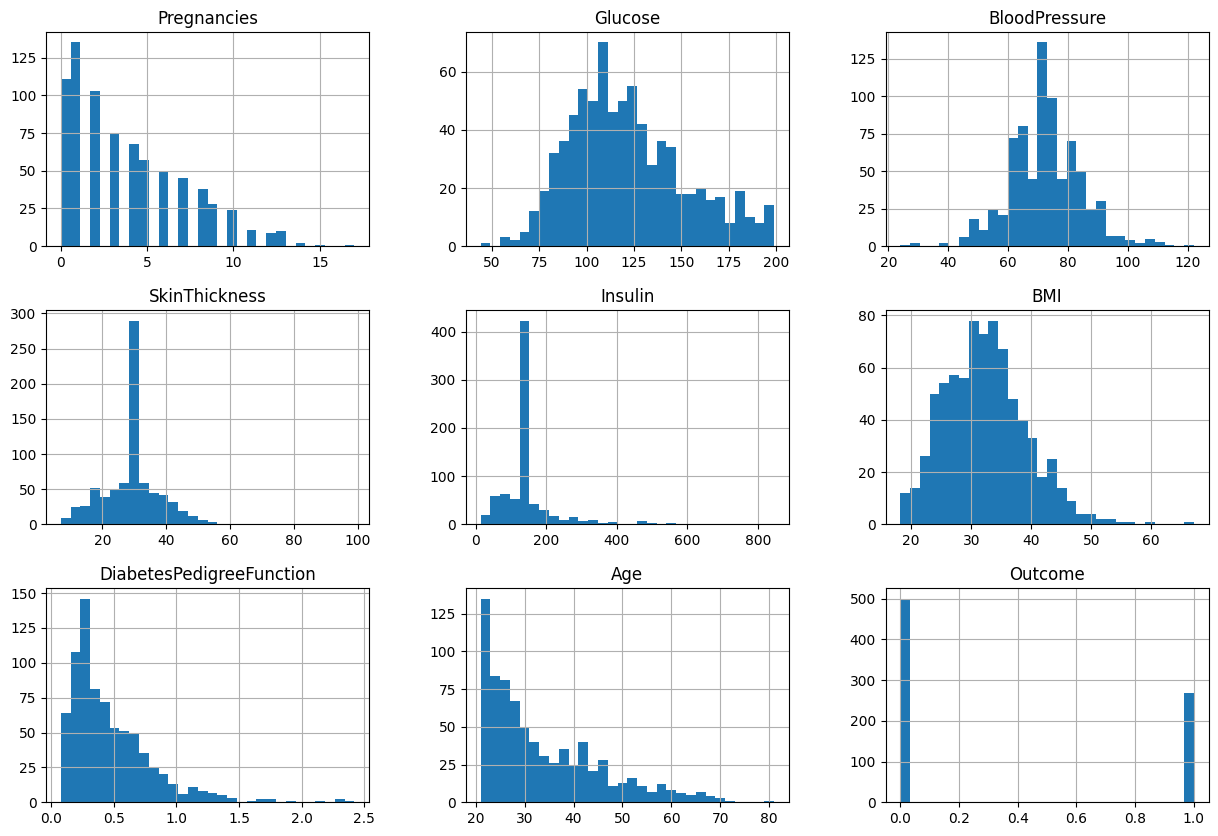

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


data.hist(bins=30, figsize=(15, 10))
plt.show()


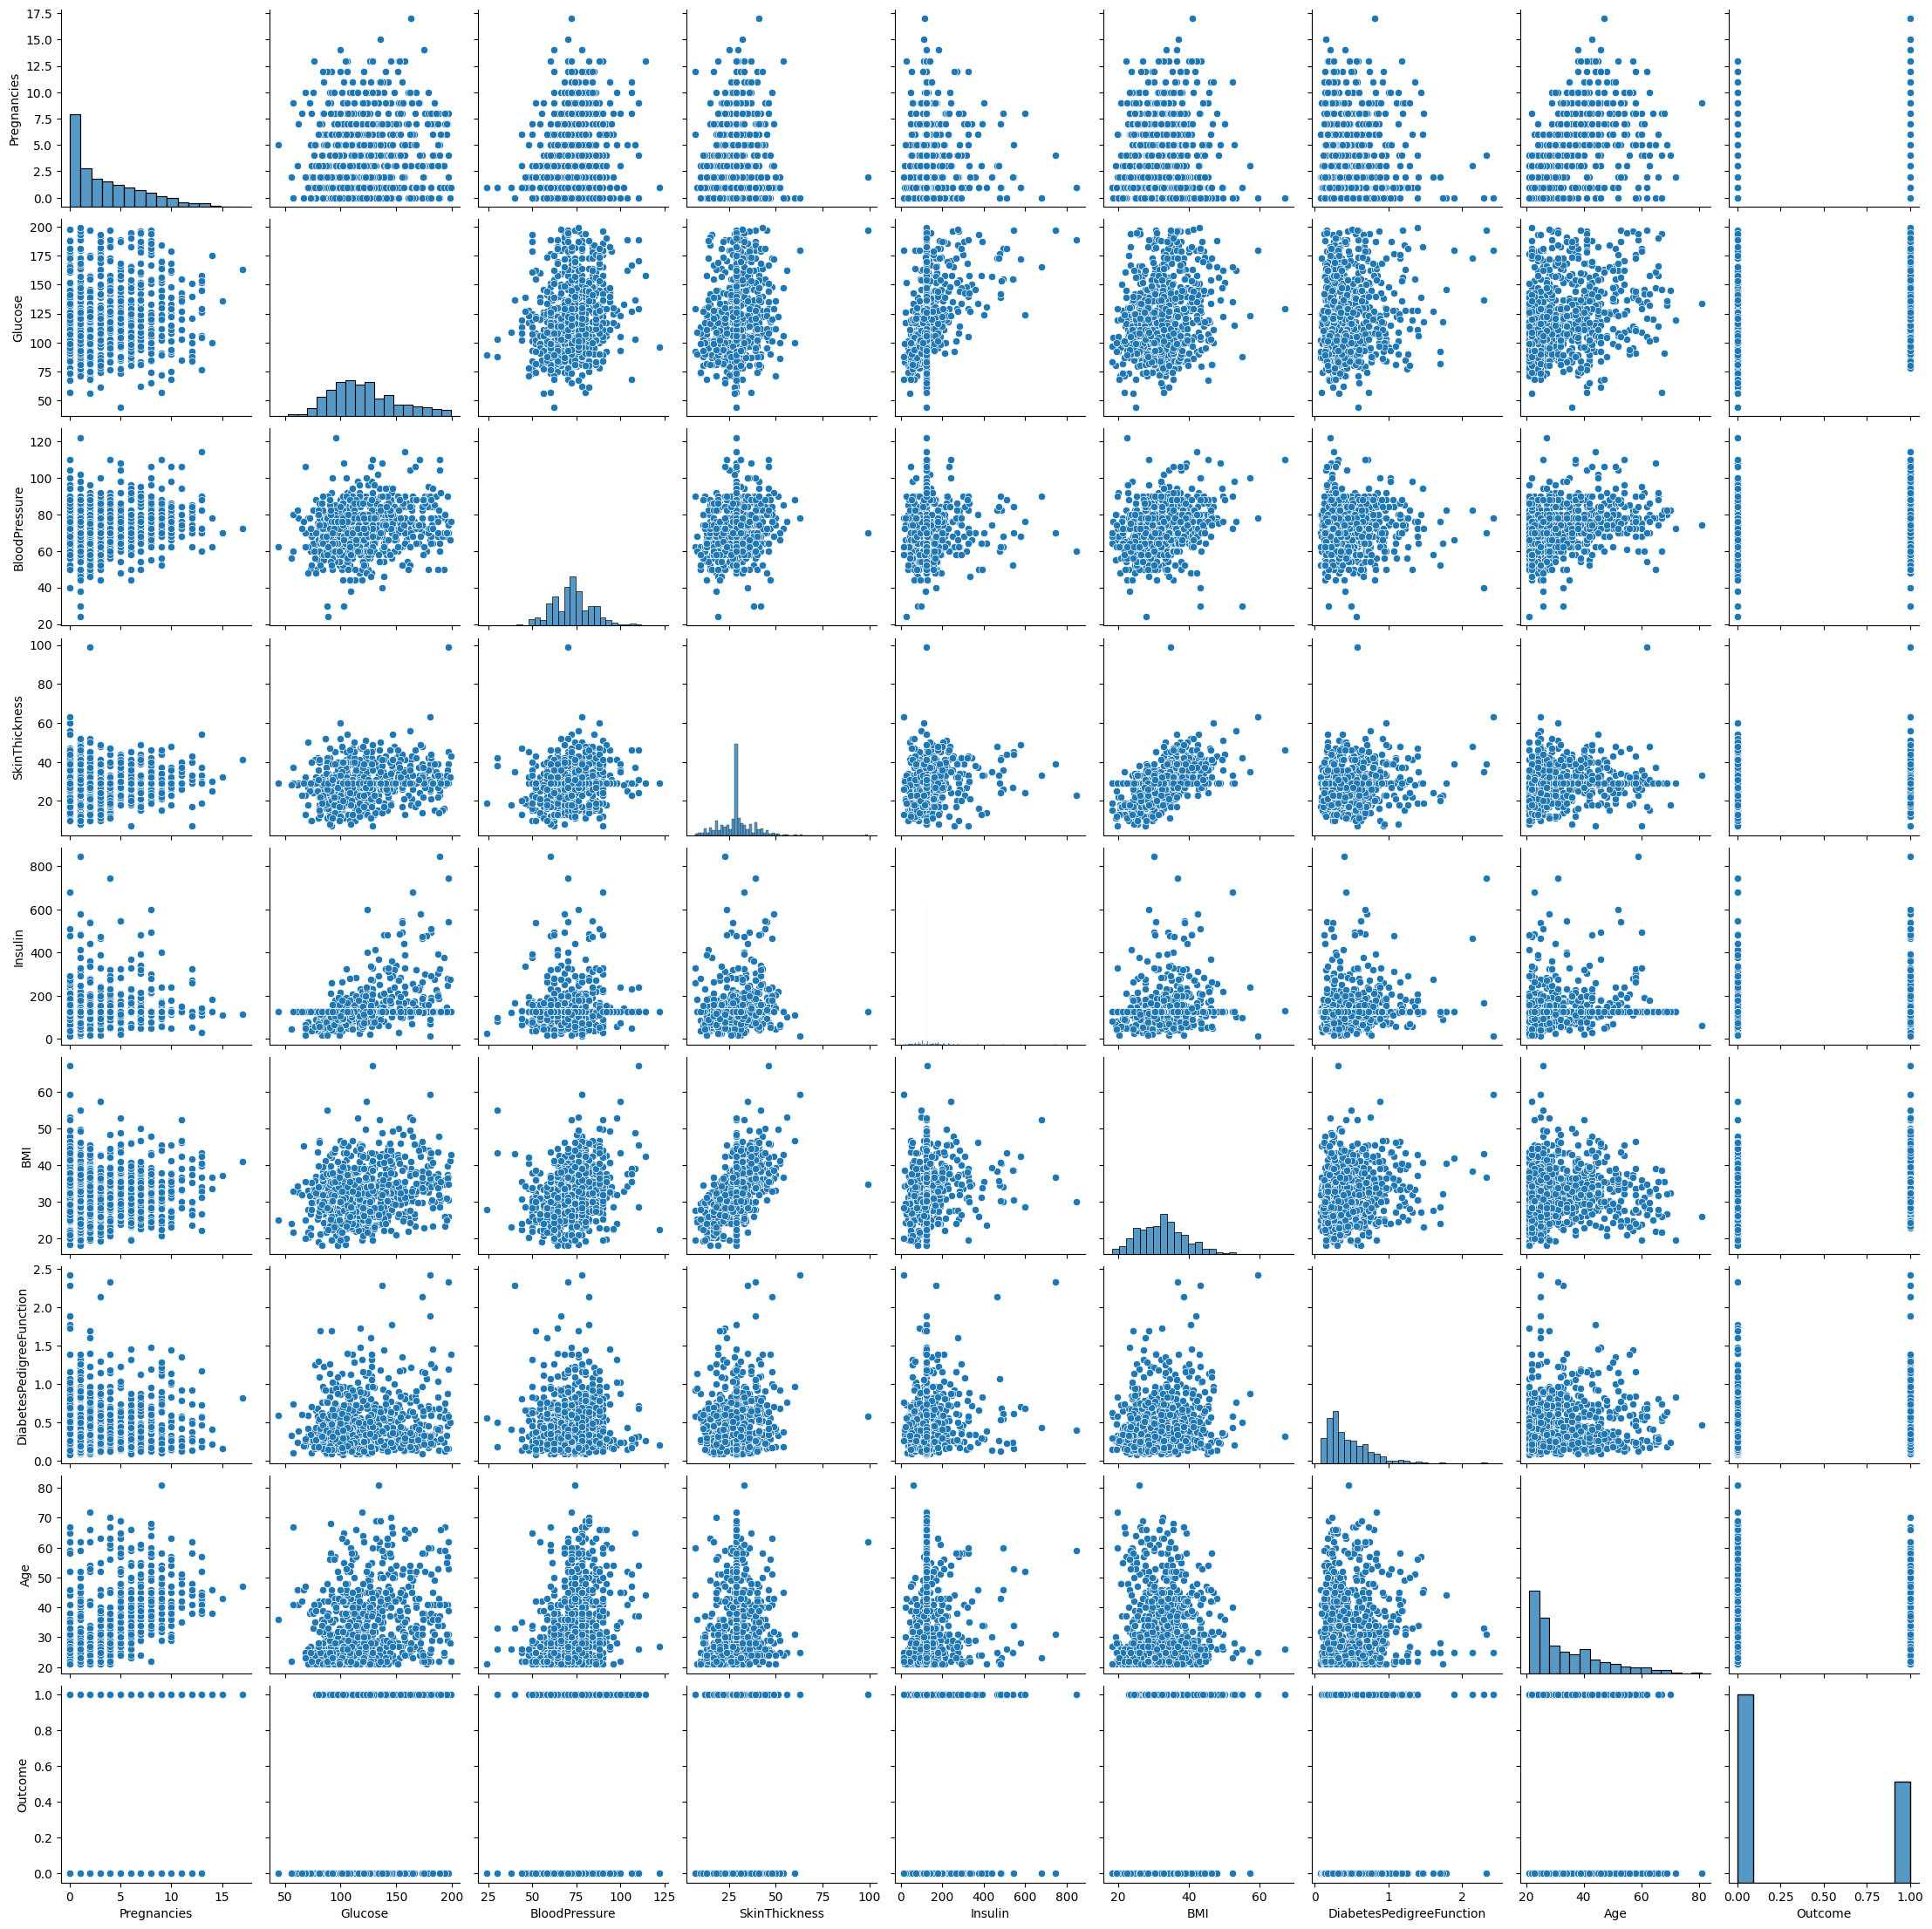

In [41]:
sns.pairplot(data = data)

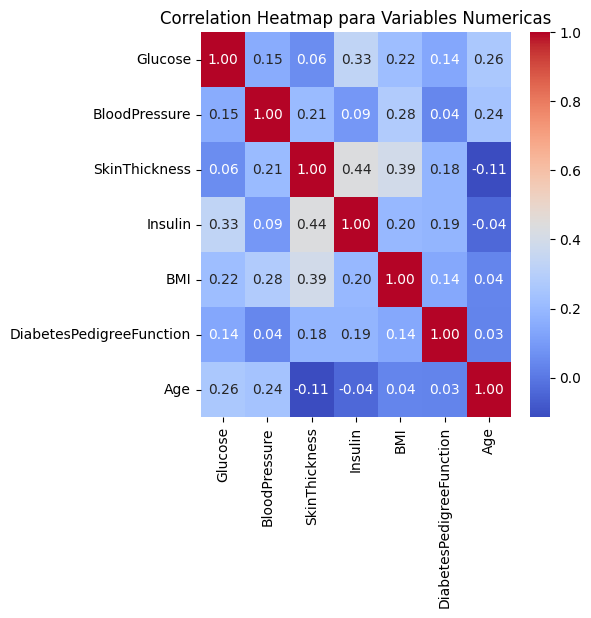

In [42]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

correlation_matrix = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap para Variables Numericas')
plt.show()


Insulin y SkinThickness: Estas variables muestran una correlación relativamente alta (0.44), lo que indica que podrían compartir información similar sobre los pacientes. 

BMI y SkinThickness: Otra correlación notable del 0.39, sugiriendo que ambas variables están relacionadas y podrían estar informando aspectos similares de la salud física relacionados con la diabetes.

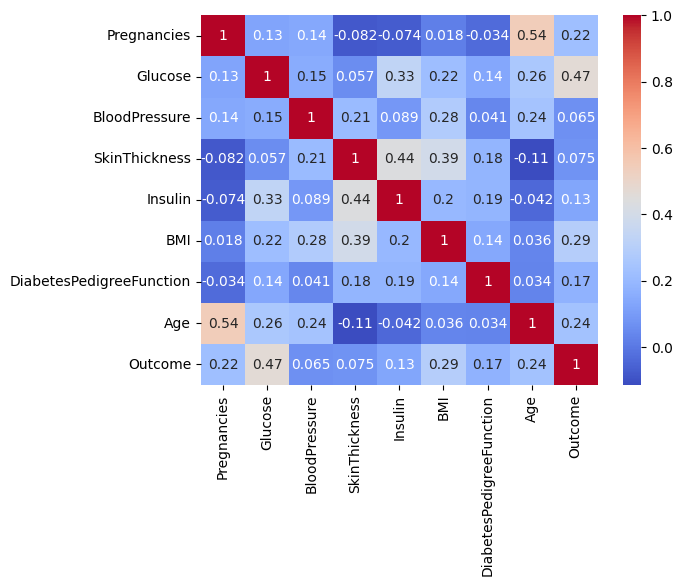

In [43]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

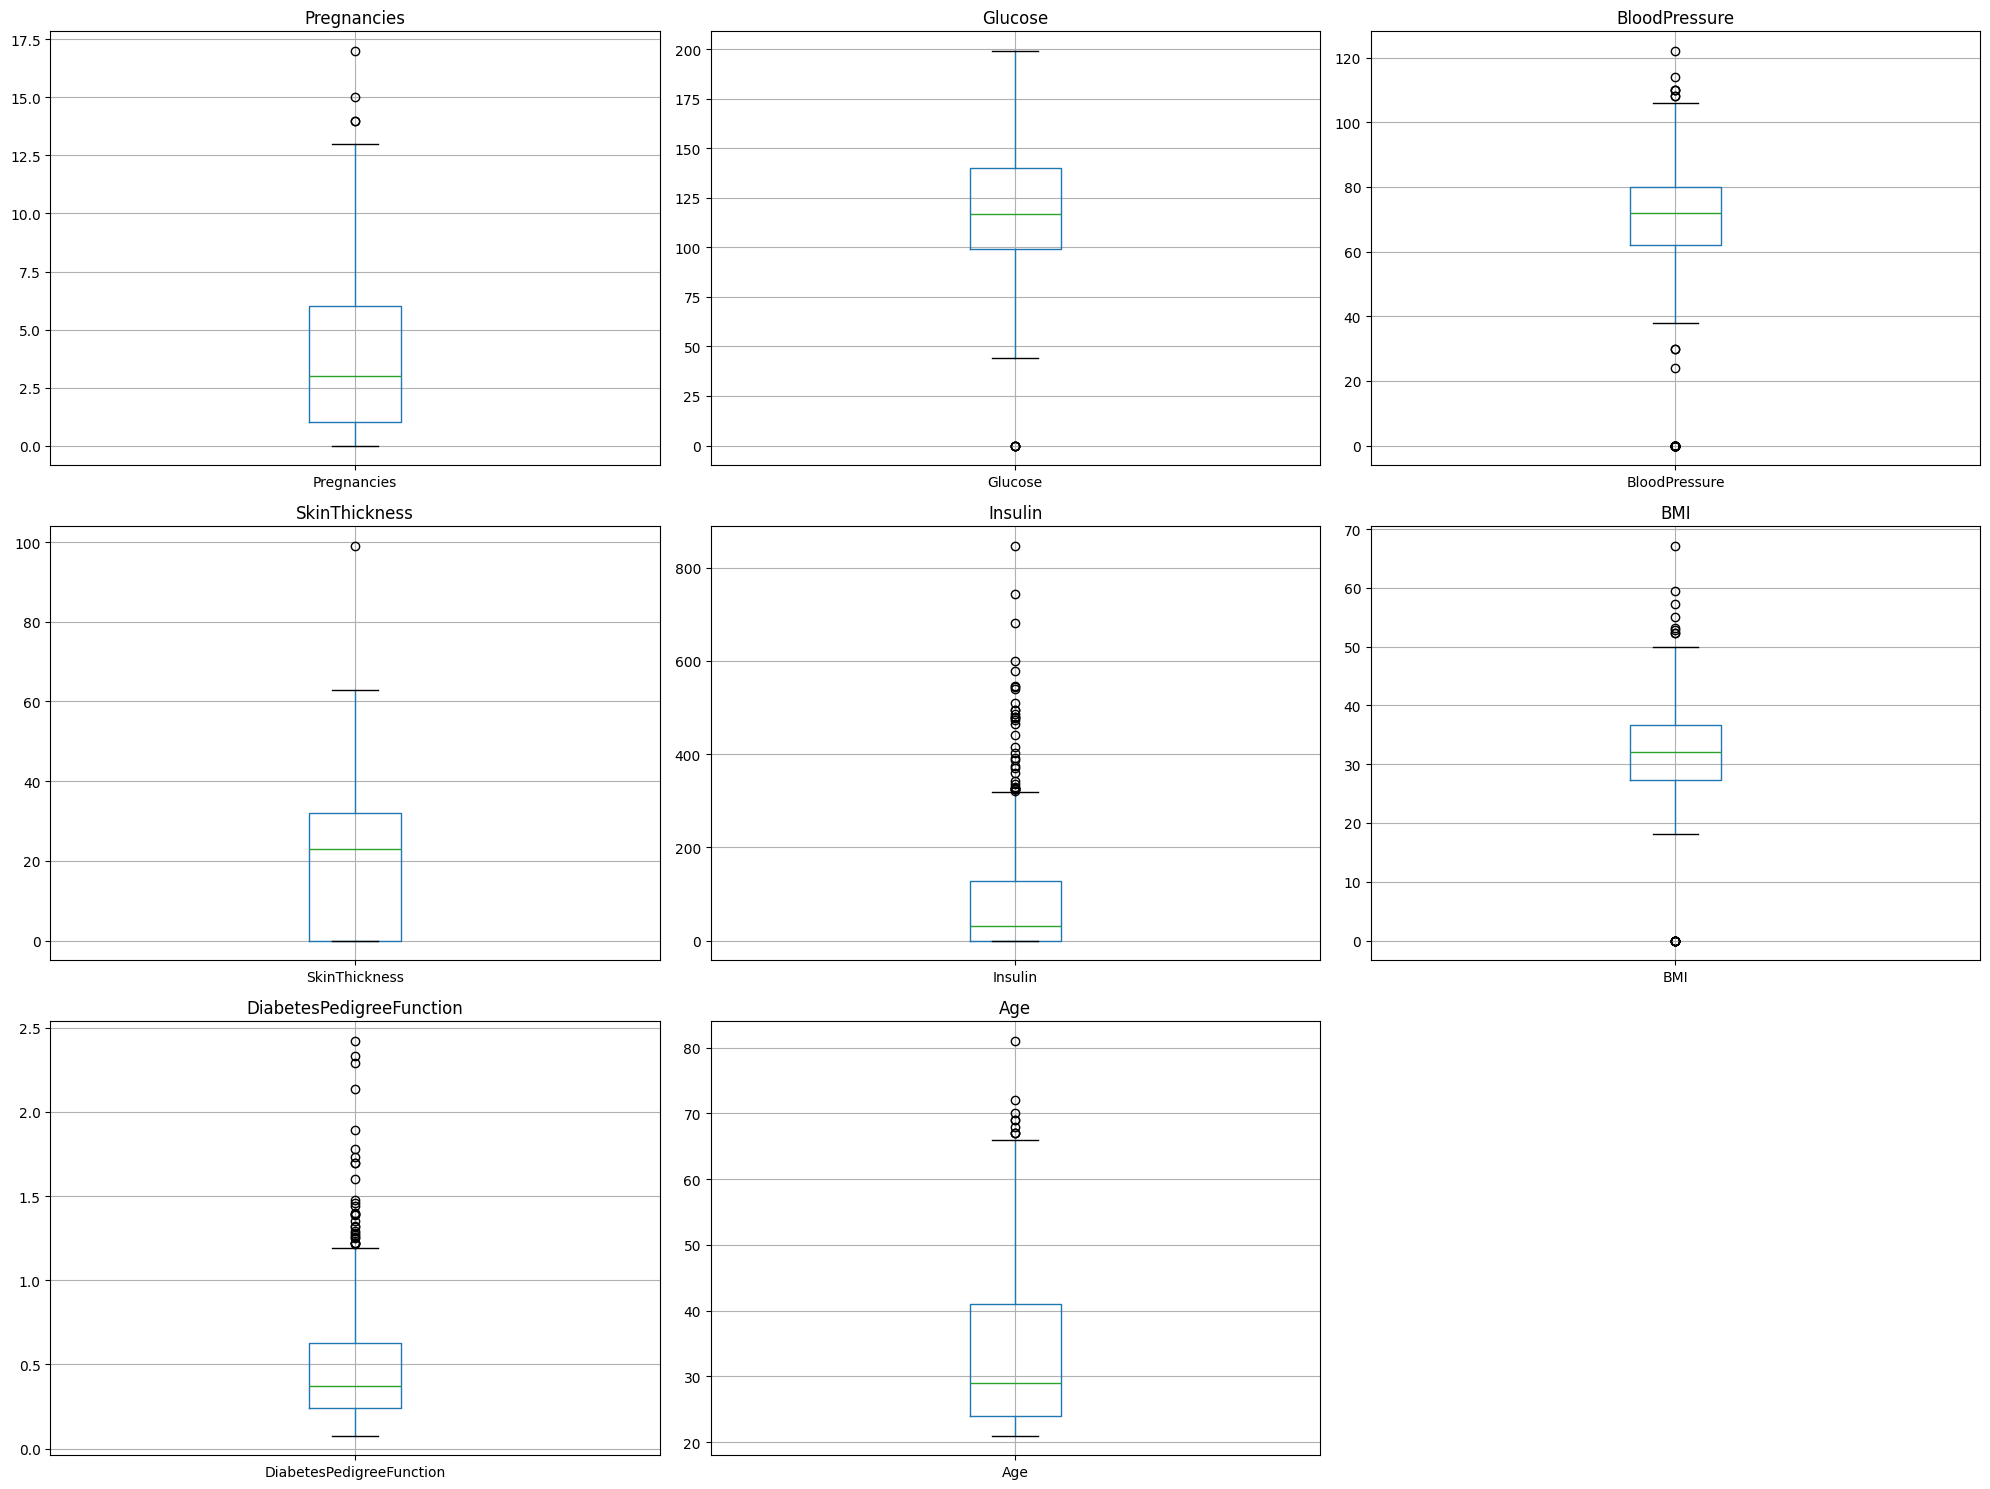

In [44]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    data.boxplot(column)
    plt.title(column)

plt.tight_layout()
plt.show()


In [45]:
import numpy as np

columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

missing_values = data.isnull().sum()

missing_values


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [46]:
for column in columns_with_zeros:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

missing_values_after_imputation = data.isnull().sum()

missing_values_after_imputation


/tmp/ipykernel_584/1216222968.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(median_value, inplace=True)
/tmp/ipykernel_584/1216222968.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

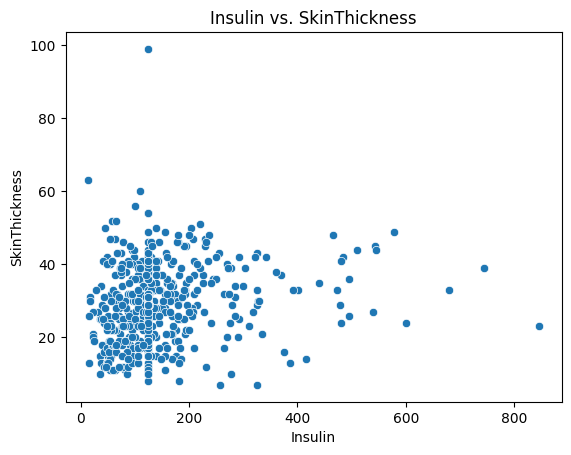

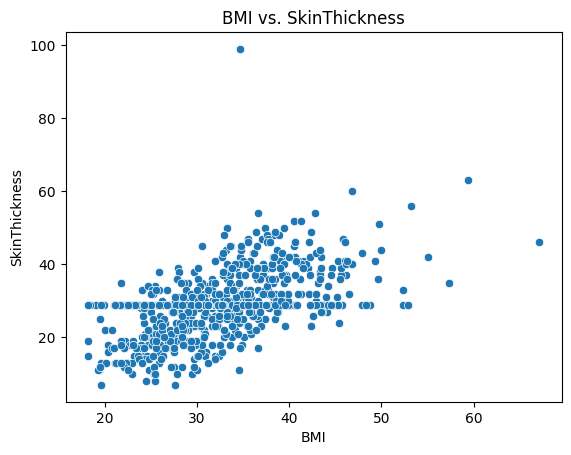

In [47]:

sns.scatterplot(data=data, x='Insulin', y='SkinThickness')
plt.title('Insulin vs. SkinThickness')
plt.show()

sns.scatterplot(data=data, x='BMI', y='SkinThickness')
plt.title('BMI vs. SkinThickness')
plt.show()

In [48]:
SkinThickness_stats = data["SkinThickness"].describe()
SkinThickness_stats

count    768.000000
mean      29.108073
std        8.791221
min        7.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [49]:
SkinThickness_iqr = SkinThickness_stats["75%"] - SkinThickness_stats["25%"]

upper_limit = SkinThickness_stats["75%"] + 1.5 * SkinThickness_iqr
lower_limit = SkinThickness_stats["25%"] - 1.5 * SkinThickness_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(SkinThickness_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 42.5 y 14.5, con un rango intercuartílico de 7.0


In [50]:
data = data[data["SkinThickness"] < 55]

In [51]:
SkinThickness_stats = data["SkinThickness"].describe()
SkinThickness_stats

count    764.000000
mean      28.896597
std        8.218257
min        7.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       54.000000
Name: SkinThickness, dtype: float64

In [52]:
BMI_iqr = BMI_stats["75%"] - BMI_stats["25%"]

upper_limit = BMI_stats["75%"] + 1.5 * BMI_iqr
lower_limit = BMI_stats["25%"] - 1.5 * BMI_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(BMI_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 50.0 y 14.0, con un rango intercuartílico de 9.0


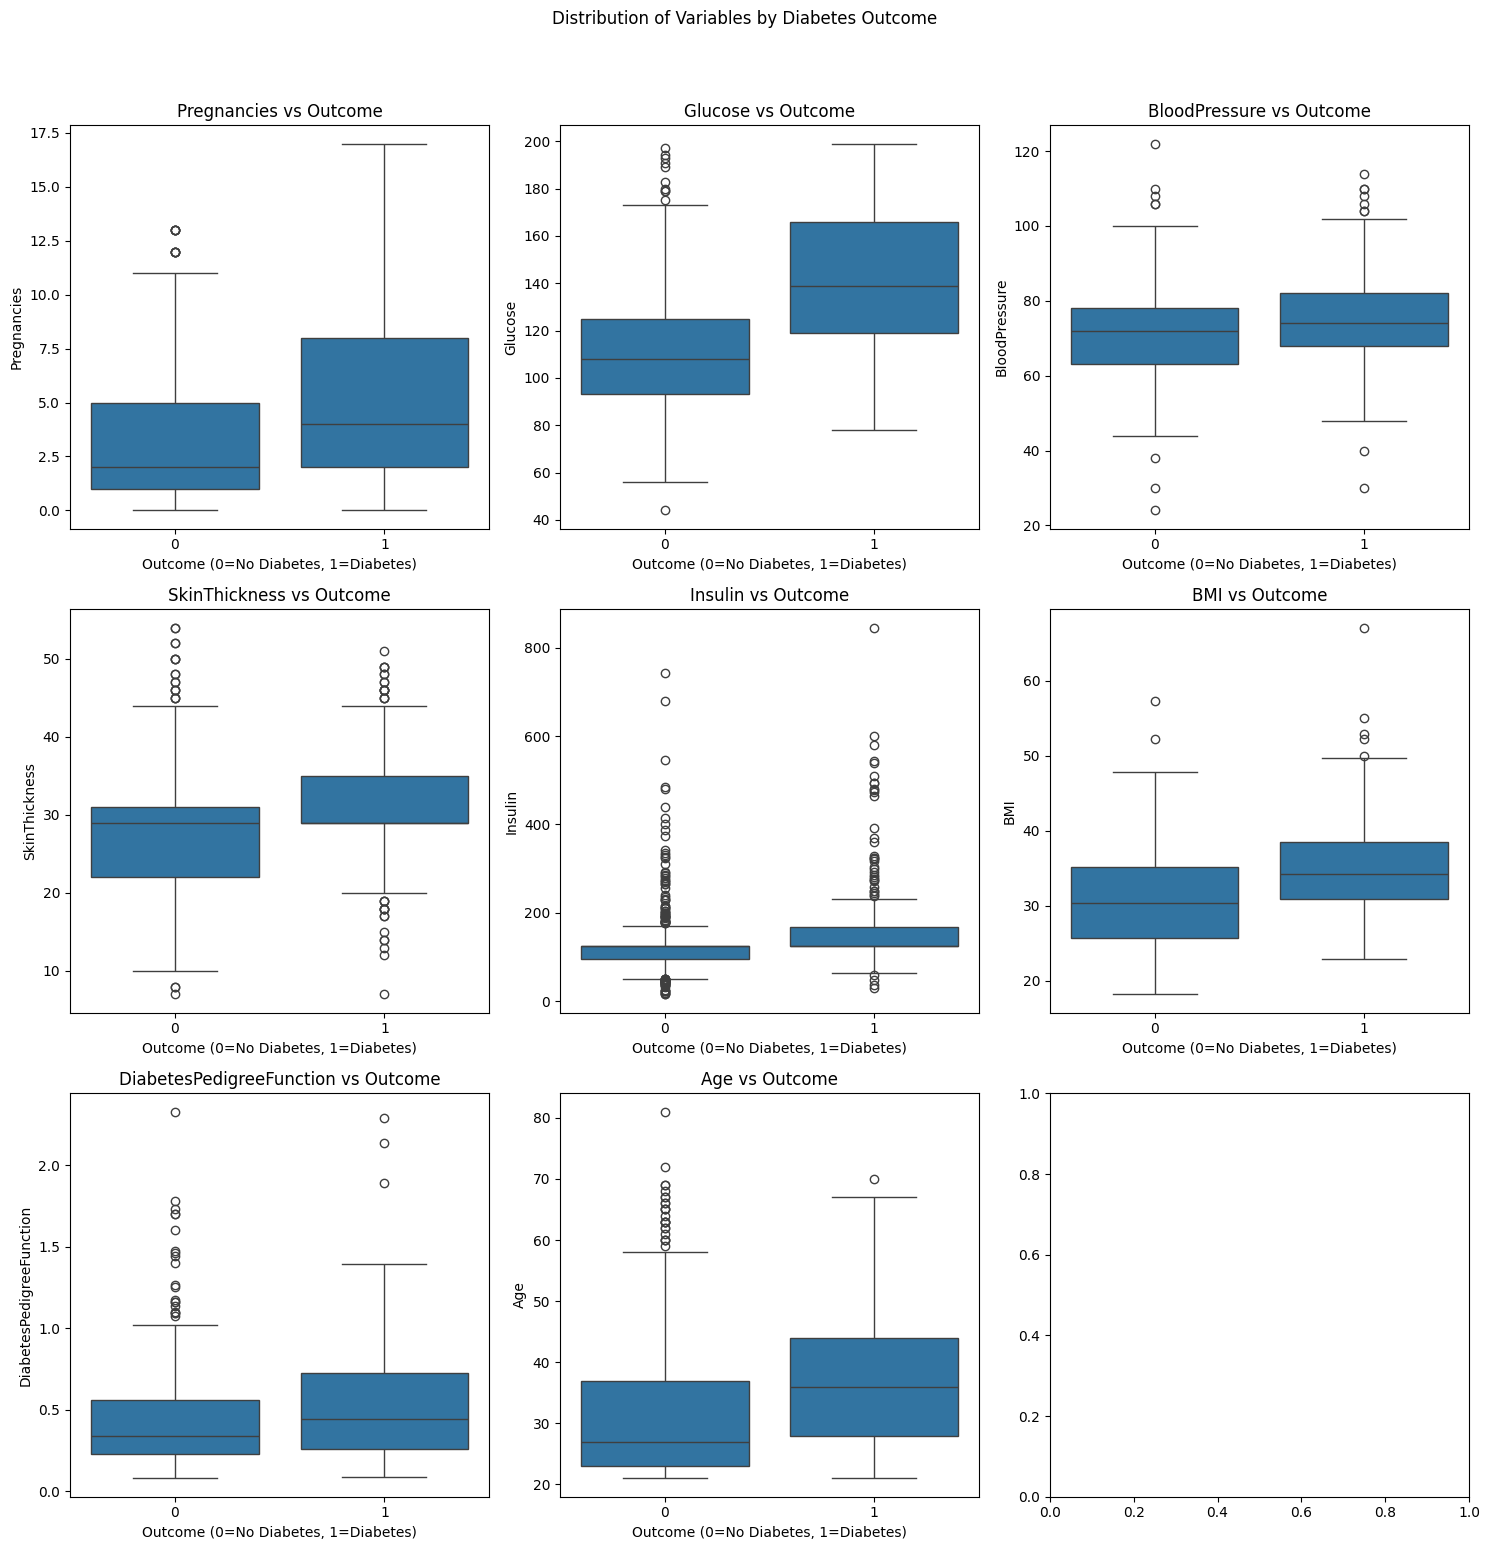

In [53]:

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Distribution of Variables by Diabetes Outcome', y=1.03)

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for ax, column in zip(axes.flatten(), columns):
    sns.boxplot(ax=ax, x='Outcome', y=column, data=data)
    ax.set_title(f'{column} vs Outcome')
    ax.set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((614, 8), (154, 8), (614,), (154,))

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation accuracy: 0.7476209516193523
